<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

!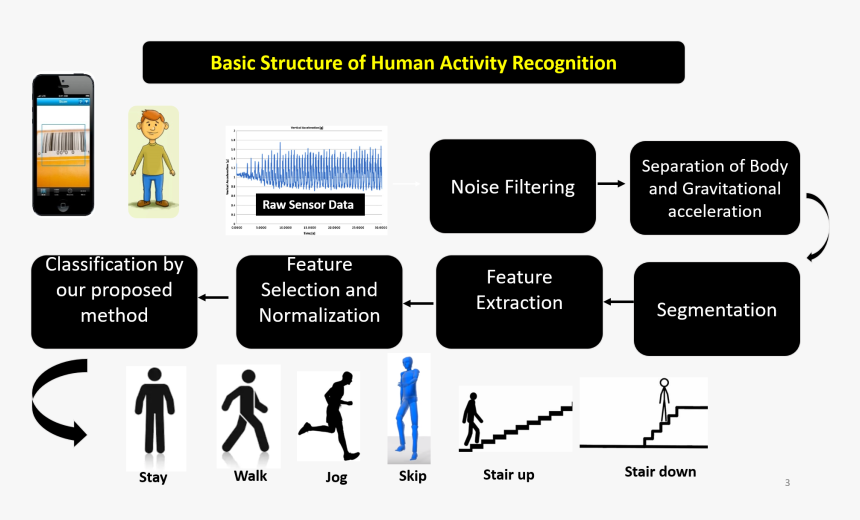

## HUMAN ACTIVITY PREDICTION (MACHINE LEARNING - ADVANCED)

**Submitted by NARAYAN V. SHANBHAG**

**GCD Student, INSAID**

**Batch: May 9,2021**

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
### Company Introduction - Yolo

##### Your client for this project is a Smartphone company - Yolo

- 1)They want to predict the human activity and draw other insights like signs of fatigue in an individual for fitness monitoring.
- 2) They want to monitor six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs).
- 3) One of the key measurements in this process is prediction of these six activities.

### Current Scenario
 - The company has captured data of 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz using the embedded accelerometer and gyroscope of the device. The experiments were video-recorded to label the data manually.
 - Machine learning can help to study data from sensors which are already present in most smartphones and can be analysed to gain rich insights about the candidates/users.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

### The company suffers from the following problems:

   - The company has collected a large amount of sensor data from smartphones but is not able to use it efficiently.
   - This data can be utilized to achieve various goals that can help an individual for better health like activity detection and also monitor signs of fatigue.

The company has hired you as data science consultants to automate the process of predicting the activity and draw other insights by analyzing the smartphone sensor data.


### Your Role
   - You are given a dataset containing the details about the participants/users.
   - Your task is to build a classification model for predicting the activity type.
   - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverable
   - Deliverable:**Human Activity Prediction.**
   - Machine Learning Task: **Classification**
   - Target Variable: **activity**
   - Win Condition: N/A (best possible model)

### Evaluation Metric
   - The model evaluation will be based on the **Accuracy Score**.

# **3. Installing & Importing Libraries**
---
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         
# Package that is required by pandas profiling
!pip install -q pandas-profiling                                    
# Library to generate basic statistics about data

# To install more libraries insert your code here..


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          
# Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# 4. Data  Description

 - The dataset contains all the necessary information about the different activities of a person which are captured from different sensors.
 - The column activity is also present in the dataset which is the activity that the person is doing.
 - This is the data that we have to **predict for future samples.**
 
#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **2887 rows** and **563 columns**
 - The last column **activity** is the **target variable**.

#### Testing Set:
 - The test set contains **8193  rows** and **11 columns**.
 - The test set **doesn’t contain** the **activity** column. 
 - It needs to be predicted for the test set.
 

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**2887**|**563**|**activity**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**8193**|**562**|**activity**|
 
 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| rn   | Unique Identity |
|02| activity  | The activity that the person is performing.| 

---
<a name = Section4></a>
# **5. Data Acquisition**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:



In [ ]:
#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Churn_train.csv']))


In [ ]:
#data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
data = pd.read_csv("D://HumanActivity_train.csv",skipinitialspace=True)
data
print('Data Shape:', data.shape)
data.head()


 ### **Data Information**
- **Totally there are 22 Columns/Features out of which 1(Id) is NUMERICAL(INTEGER), 1 is CATEGORICAL and the rest are NUMERICAL(FLOAT)**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**


In [ ]:
# Insert your code here
data.info()

### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
-**Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [ ]:
data.describe()

In [ ]:
data_final = pd.read_csv("D://HumanActivity_test.csv",skipinitialspace=True)
print('Data Shape:', data_final.shape)
data_final.head()

In [ ]:
data_final.info()

In [ ]:
data_final.describe()

---
<a name = Section5></a>
# **6. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [ ]:
# Insert your code here...
profile_Employee_Access_Prediction_Train = ProfileReport(df=data)
profile_Employee_Access_Prediction_Train

**5.1 Data Pre-Profiling for TEST SET**

In [ ]:
profile1_Human_Activity_Prediction_Test = ProfileReport(df=data_final)
profile1_Human_Activity_Prediction_Test

---
<a name = Section6></a>
# **7. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [ ]:
# Insert your code here...
data[data.duplicated()]

In [ ]:
data_final[data_final.duplicated()]

-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

In [ ]:
data.isnull().sum()

In [ ]:
(data == 0 ).sum(axis = 0)

In [ ]:
data_final.isnull().sum()

### **Check whether the DataSet is Balanced for the label column**

In [ ]:
data.label.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90);
data.label.value_counts()

In [ ]:
figure = plt.figure(figsize = (20,10))
HeatMap = sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm',vmin = -1, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

### OBSERVATIONS

In [ ]:
import sweetviz as sv
sweet_report_Employee_Access_Prediction = sv.analyze(data)
sweet_report_Employee_Access_Prediction.show_html('Seattle_Weather_Prediction_Sweet_Report_.html')

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('D:/HumanActivity_train.csv',verbose=2,save_plot_dir="D:/")  

---
# **6. Exploratory Data Analysis**

#### **Question:** What is the distribution of the **target** feature?

In [ ]:
# Plot a displot on target variable
data_sns = data
sns.displot(x='label', data=data_sns, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

# **7. Data Post Processing**

### **7.1 Feature Scaling**

- Now we will **standardize** the columns of the dataframe using `StandardScaler`. 

In [ ]:
y = data[['activity']]
y.head()

In [ ]:
data1 = data.drop('activity', axis = 1)
data = data1.drop('rn', axis = 1)

In [ ]:
x= data

In [ ]:
x.head()

In [ ]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(x)

# Inputting our transformed data in a dataframe
scaled_frame = pd.DataFrame(data=scaled_arr, columns=x.columns)

# Getting a glimpse of transformed data
scaled_frame.head()
scaled_frame.describe()

In [ ]:
scaled_frame.head()

In [ ]:
x = scaled_frame
x

In [ ]:
datatype = y.dtypes['activity']
print(datatype)

### AT THIS POINT I AM GETTING ERROR ...WIERD OUTPUT

In [ ]:
y.head()

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

### Import the train Import the train test split and split the data into train and test data for x and y.

-from sklearn.model_selection import train_test_split split and split the data into train and test data for x and y.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

# **8. Model Development & Evaluation**

### **8.1 Model Development & Evaluation without PCA**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import plotly.graph_objs as go                                      # Importing plotly for interactive visualizations
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features in the dataset
from sklearn.model_selection import train_test_split                # To properly split the dataset into train and test sets
from sklearn.ensemble import RandomForestClassifier                  # To create a random forest regressor model
from sklearn.linear_model import LogisticRegression                   # To create a linear regression model
from sklearn import metrics                                         # Importing to evaluate the model used for regression
from sklearn.decomposition import PCA                               # Importing to create an instance of PCA model
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # For time functionality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### Perform PCA and draw the PCA Analysis Curve to check the Optimal Performance for the Requisite number of PCA Components

In [ ]:
# Perform PCA on X (standardized features)
pca = PCA(n_components= 0.99, random_state=0).fit(x_train)

# Calculate the explained variance
var = np.cumsum(np.round(a=pca.explained_variance_ratio_, decimals=3) * 100)

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Scatter(x=list(range(1000)),
                               y= var,
                               name="'Cumulative Explained Variance'",
                               mode='lines+markers'))

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='PCA Analysis', 
                  title_x=0.5,
                  xaxis_title='Number of components', 
                  yaxis_title='Explained Variance %')

# Display the figure
fig.show()

In [ ]:
pca = PCA(n_components=136, random_state=0)

X_pca_train = pca.fit_transform(x_train)
X_pca_test = pca.transform(x_test)

# Printing shape of X_train and X_test
print('Shape of X_train: ', X_pca_train.shape)
print('Shape of X_test: ', X_pca_test.shape)

### Importing the evaluation metrics for Classification models ..viz. DecisoonTreeClassifier, KNN Classifier, Support Vector Machine(SVM-Classifier), GradientBooostingClassifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### Analyze which Algo Classifier predicts the BEST RESULT and also check the Computation Time

In [ ]:
clfs = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
       ,SVC(kernel = 'linear', C = 1),KNeighborsClassifier(n_neighbors = 6), GradientBoostingClassifier()]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(X_pca_train, y_train)

  # Make predictions on the trained model
  predictions = clf.predict(X_pca_test)

  # Estimating the model performance
  #RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
  #R_squared = metrics.r2_score(y_test, predictions)

  ACCURACY_SCORE = accuracy_score(y_test,predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[ACCURACY SCORE]:', ACCURACY_SCORE, '[Processing Time]:', elapsed_time, 'seconds')
  print('----------------------------------------\n')

In [ ]:
logreg_model =  LogisticRegression(solver='liblinear')
logreg_model.fit(X_pca_train, y_train)

In [ ]:
y_pred_train_lr = logreg_model.predict(X_pca_train)
y_pred_train_lr

In [ ]:
y_pred_test_lr = logreg_model.predict(X_pca_test)
y_pred_test_lr

In [ ]:
svc_model_linear = SVC(kernel = 'linear', C = 1)
svc_model_linear.fit(X_pca_train, y_train)
svc_model_linear

In [ ]:
y_pred_train_svc = svc_model_linear.predict(X_pca_train)
y_pred_train_svc

In [ ]:
y_pred_test_svc = svc_model_linear.predict(X_pca_test)
y_pred_test_svc

### ACCURACY SCORE of Logistic regression Train Set

In [ ]:
ACCURACY_SCORE_TRAIN_LR = accuracy_score(y_train,y_pred_train_lr)
print(ACCURACY_SCORE_TRAIN_LR)


### ACCURACY SCORE of Logistic regression Test Set

In [ ]:
ACCURACY_SCORE_TEST_LR = accuracy_score(y_test,y_pred_test_lr)
print(ACCURACY_SCORE_TEST_LR)

### ACCURACY SCORE of Support Vector Machine(SVM) Classifier Train Set

In [ ]:
ACCURACY_SCORE_TRAIN_SVC = accuracy_score(y_train,y_pred_train_svc)
print(ACCURACY_SCORE_TRAIN_SVC)

### ACCURACY SCORE of Support Vector Machine(SVM) Classifier Test Set

In [ ]:
ACCURACY_SCORE_TEST_SVC = accuracy_score(y_test,y_pred_test_svc)
print(ACCURACY_SCORE_TEST_SVC)

## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [ ]:
data_submission = data_final['rn']
data_submission

### By MISTAKE they have included 'activity' column in the Test Set as well ..@@@$$%%&&***((( ?????

In [ ]:
data_final1 = data_final.drop('rn', axis = 1)
data_final = data_final1.drop('activity', axis = 1)

In [ ]:
data_final.head()

### Apply SCALAR Transform using the already created Scaler Instance

In [ ]:
scaled_arr_final = scaler.fit_transform(data_final)

# Inputting our transformed data in a dataframe
data_final_model = pd.DataFrame(data=scaled_arr_final, columns=data_final.columns)

# Getting a glimpse of transformed data
data_final_model.head()
data_final_model.describe()

### Apply PCA with 136 componenets using the earlier created PCA instance and transform

In [ ]:
pca_data_final_model = pca.transform(data_final_model)

### Predict the label values using the earlier trained Logistic Regression Model

In [ ]:
y_pred_test_final_logistic = logreg_model.predict(pca_data_final_model)
y_pred_test_final_logistic

### Convert the array into a DataFrame

In [ ]:
y_pred_test_final_logistic = pd.DataFrame(y_pred_test_final_logistic)

In [ ]:
y_pred_test_final_logistic

In [ ]:
y_pred_test_final_svc = svc_model_linear.predict(pca_data_final_model)
y_pred_test_final_svc

In [ ]:
y_pred_test_final_svc = pd.DataFrame(y_pred_test_final_svc)
y_pred_test_final_svc

## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(Id) and TARGET column(label)

In [ ]:
submission_file = pd.concat([data_submission,y_pred_test_final_svc], axis = 1)

In [ ]:
submission_file

### To write the final data to the submission file which is .csv without HEADER and INDEX

In [ ]:
submission_file.to_csv('D://Human_Activity_Prediction_Submission.csv', header=False, index=False)

### Thank You !!!